# Optimalisatie van oplospende visvangst
-  Ga opzoek naar de optimale combinatie starttijd/eindtijd
 - visvangst mag maar toenemen tot 0.7 MSY
 - vangst mag pas over twee jaar starten
    
    


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [65]:
harvest_rates = [2e4, 5e4, 1e5, 2e5]
data = []

maximum_growth_rate = 0.5
carrying_capacity = 2e6 

maximum_harvest_rate = 0.7 * 2.5e5
ramp_start = 2.
ramp_end = 6.

end_time = 10.
h = 0.1
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

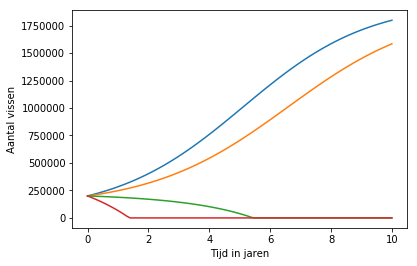

In [66]:
def logistic_growth():
    fish = np.zeros(num_steps + 1)
    fish[0] = 2e5

    for harvest_rate in harvest_rates:
        is_extinct = False
        
        for step in range(num_steps):
            if is_extinct: 
                fish_next_step = 0.
            else: 
                #fish_next_step = fish[step] + h * (maximum_growth_rate * (1. - fish[step]))
                fish_next_step = fish[step] + h * (maximum_growth_rate * (1. - fish[step] / carrying_capacity) * fish[step] - harvest_rate)
                if fish_next_step <= 0.:
                    is_extinct = True
                    fish_next_step = 0.
            fish[step+1] = fish_next_step
            
        data.append(plt.plot(times,fish))
        plt.xlabel("Tijd in jaren")
        plt.ylabel("Aantal vissen")
        
    return fish

fish = logistic_growth()

Text(0,0.5,'Amount of fish in tons')

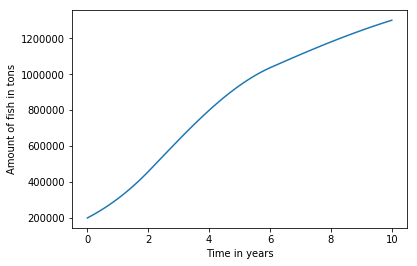

In [67]:
def harvest():
    fish = np.zeros(num_steps + 1) # tons
    fish[0] = 2e5

    is_extinct = False
    for step in range(num_steps):
        time = h * step
        harvest_factor = 0.0;
        if time > ramp_end:
            harvest_factor = 1.0
        elif time > ramp_start:
            harvest_factor = (time - ramp_start) / (ramp_end - ramp_start)
        harvest_rate = harvest_factor * maximum_harvest_rate
        if is_extinct:
            fish_next_step = 0.
        else:
            fish_next_step = fish[step] + h * (maximum_growth_rate * (1. - fish[step] / carrying_capacity) * fish[step] - harvest_rate)
            if fish_next_step <= 0.:
                is_extinct = True
                fish_next_step = 0.
        fish[step + 1] = fish_next_step

    return fish

fish = harvest()

plt.plot(times,fish)
axes = plt.gca()
axes.set_xlabel('Time in years')
axes.set_ylabel('Amount of fish in tons')